In [ ]:
import os
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from preprocessing.load_intersections import load_location
import preprocessing.imagery.join_and_stitch as jas
from dotenv import load_dotenv

In [10]:
load_dotenv()
DATA_PATH_STEM = os.getenv('DATA_PATH')

Z_LEVEL = 20

STATIC_REL_PATH = 'imagery/tiles/static/nyc'
STATIC_REL_PATH = f'tile2net_export/dt_bk/2024/tiles/static/nyc/256_{Z_LEVEL}'
STATIC_PATH = os.path.join(DATA_PATH_STEM, STATIC_REL_PATH)

TILEREF_REL_PATH = f'tile2net_export/dt_bk/2024/tiles/2024_256_{Z_LEVEL}_info.csv'
TILEREF_PATH = os.path.join(DATA_PATH_STEM, TILEREF_REL_PATH)

SAVE_FULLIMAGE_REL_PATH = 'test/dt_bk_test/intx_full_z20'
SAVE_FULLIMAGE_PATH = os.path.join(DATA_PATH_STEM, FULLIMAGE_REL_PATH)

In [ ]:
import pandas as pd

# Get Nodes
nodes, edges = load_location('Downtown Brooklyn, New York, USA')

# Make Tile Ref GDF
tile_ref_gdf = jas.load_tile_reference(TILEREF_PATH)

# Buffer and Load
intersection2tile = jas.buffer_and_load(nodes, tile_ref_gdf, STATIC_PATH, buffer_width=20)

imgs = intersection2tile.groupby('intersection_id').apply(jas._safe_stitch_image)

#imgs = intersection2tile.groupby(level=0).apply(jas._safe_stitch_image)

itx_names = jas.find_intersection_names(edges)
images_df = pd.concat([itx_names, imgs], axis=1)
images_df.columns = ['name','image']

# for r in images_df[images_df['image'].notna()].to_records():
#     print(f"Writing {r.index}-{r['name']}...")
#     file_path = jas._write_image(r['image'], r.index, r['name'], dir_path=SAVE_FULLIMAGE_PATH)

# Only operate on rows where 'image' is notna
mask = images_df['image'].notna()

# Apply the function, assigning the result to a new column
images_df.loc[mask, 'file_path'] = images_df.loc[mask].apply(jas.write_image, save_path=SAVE_FULLIMAGE_PATH, axis=1)


INFO: Converting intersection graph to GeoDataFrames...
INFO: Consolidating intersections...
INFO: Done consolidating intersections.
INFO: Done.
5: need at least one array to concatenate
6: need at least one array to concatenate
10: need at least one array to concatenate
11: need at least one array to concatenate
21: need at least one array to concatenate
33: need at least one array to concatenate
36: need at least one array to concatenate
39: need at least one array to concatenate
50: need at least one array to concatenate
59: need at least one array to concatenate
60: need at least one array to concatenate
64: need at least one array to concatenate
66: need at least one array to concatenate
69: need at least one array to concatenate
Writing 0-Flatbush_Extension_|_Willoughby...
Writing 1-Boerum_Place_|_Adams...
Writing 2-Fulton_Mall_|_Willoughby...
Writing 3-Fulton_Mall_|_Smith...
Writing 4-Fulton_Mall_|_Hoyt...
Writing 7-Fulton_Mall_|___...
Writing 8-Flatbush_|_Flatbush_Extension...


In [ ]:
#nodes#, images_df[['name','file_path']]
intersection2tile



file_path
intersection_id xtile  ytile                                                    
0               308797 394323  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394324  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                308798 394323  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394324  /Users/jon/Documents/Employment/2025 VIDA Lab/...
1               308780 394323  /Users/jon/Documents/Employment/2025 VIDA Lab/...
...                                                                          ...
69              308794 394337  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394339  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                308793 394338  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394337  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394339  /Users/jon/Documents/Employment/2025 VIDA Lab/...

[482 rows x 1 columns]

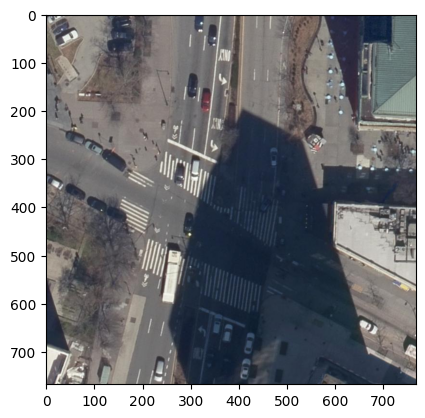

In [7]:
import matplotlib.pyplot as plt
plt.imshow(imgs[1])

In [ ]:
import numpy as np
from PIL import Image

sorted_df = intersection2tile.loc[3].sort_index()
#len(set(srted.groupby(level=0).count()['file_path'])) == 1

tile_arrays = [np.array(Image.open(i)) for i in sorted_df['file_path']]
tile_arrays

tile_ararys[0]
#= tile_arrays.shape[1:]
# test = str(sorted_df.iloc[0]['file_path'])
# Image.open(test)

#np.int(np.sqrt(tile_arrays.shape[0]))
# np.sqrt(tile_arrays.shape[0])



#[np.array(3,3),tile_arrays.shape[1:]]
#np.concat([np.array([3,3]), tile_arrays.shape[1:]])

9

In [21]:
import pandas as pd
itx_names = cas.find_intersection_names(edges)
images_df = pd.concat([itx_names, imgs], axis=1)
images_df.columns = ['name','image']
images_df

for r in images_df[images_df['image'].notna()].to_records():
    print(f"Writing {r.index}-{r['name']}...")
    file_path = cas._write_image(r['image'], r.index, r['name'], dir_path='../proj_data/test/intx_locations_z20/')

# Only operate on rows where 'image' is notna
mask = images_df['image'].notna()

# Apply the function, assigning the result to a new column
images_df.loc[mask, 'file_path'] = images_df.loc[mask].apply(cas.write_image, save_path='../proj_data/test/intx_locations_z20/', axis=1)



Writing 0-Flatbush_Extension_|_Willoughby...
Writing 1-Boerum_Place_|_Adams...
Writing 2-Fulton_Mall_|_Willoughby...
Writing 3-Fulton_Mall_|_Smith...
Writing 4-Fulton_Mall_|_Hoyt...
Writing 7-Fulton_Mall_|___...
Writing 8-Flatbush_|_Flatbush_Extension...
Writing 9-Livingston_|___...
Writing 12-Bridge_|_Metrotech_Center...
Writing 13-Metrotech_Center_|_Lawrence...
Writing 14-Hanover_Place_|___...
Writing 15-Jay_|_Tech_Place...
Writing 16-Tech_Place_|_Lawrence...
Writing 17-Tech_Place_|_Bridge...
Writing 18-Flatbush_Extension_|_Tech_Place...
Writing 19-Tillary_|_Bridge...
Writing 20-MetroTech_Walk_|___...
Writing 22-Flatbush_Extension_|_Fleet...
Writing 23-Flatbush_Extension_|_DeKalb...
Writing 24-Smith_|_Livingston...
Writing 25-Schermerhorn_|_Smith...
Writing 26-Tillary_|_Adams...
Writing 27-Lawrence_|_Willoughby...
Writing 28-Willoughby_|_Bridge...
Writing 29-Willoughby_|_Duffield...
Writing 30-Boerum_Place_|_Livingston...
Writing 31-Tillary_|_Jay...
Writing 32-Elm_Place_|_Livingston.

0 3
3 6
6 9


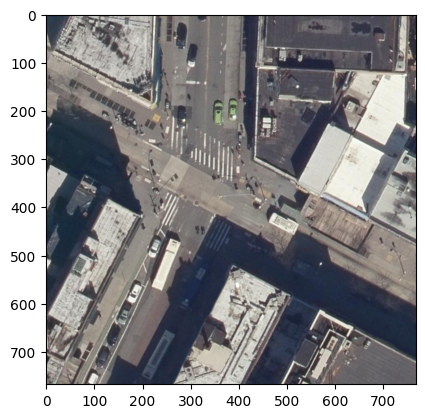

In [20]:
sorted_df
tile_arrays = [np.array(Image.open(i)) for i in sorted_df['file_path']]
tile_rows = []
for i in range(3):
    id_min = i*3
    id_max = ((i+1)*3)
    print(id_min, id_max)
    new_row = np.vstack(tile_arrays[id_min:id_max])
    tile_rows.append(new_row)

plt.imshow(np.hstack(tile_rows))

In [13]:
### Cut out

os.listdir('../proj_data/test/intx_locations_z20')

['52_Myrtle_|_Lawrence.png',
 '36_Livingston_|_Hoyt.png',
 '39_MetroTech_Walk_|___.png',
 '1_Boerum_Place_|_Adams.png',
 '31_Tillary_|_Jay.png',
 '45_Fulton_Mall_|_Lawrence.png',
 '57_Jay_|___.png',
 '8_Flatbush_|_Flatbush_Extension.png',
 '65___.png',
 '28_Willoughby_|_Bridge.png',
 '61_Albee_Square_|___.png',
 '38_Nevins_|_Livingston.png',
 '14_Hanover_Place_|___.png',
 '51_Jay_|___.png',
 '56_Livingston_|___.png',
 '40_Tillary_|___.png',
 '9_Livingston_|___.png',
 '30_Boerum_Place_|_Livingston.png',
 '29_Willoughby_|_Duffield.png',
 '3_Fulton_Mall_|_Smith.png',
 '32_Elm_Place_|_Livingston.png',
 '63_Adams_|___.png',
 '5_Fulton_Mall_|_Albee_Square.png',
 '48_Jay_|_Metrotech_Center.png',
 '0_Flatbush_Extension_|_Willoughby.png',
 '27_Lawrence_|_Willoughby.png',
 '19_Tillary_|_Bridge.png',
 '15_Jay_|_Tech_Place.png',
 '59_nan.png',
 '4_Fulton_Mall_|_Hoyt.png',
 '13_Metrotech_Center_|_Lawrence.png',
 '6_Fulton_Mall_|_Bond.png',
 '68___.png',
 '21_Flatbush_Extension_|___.png',
 '64___.pn

xtile
308797    2
308798    2
Name: file_path, dtype: int64
{2}


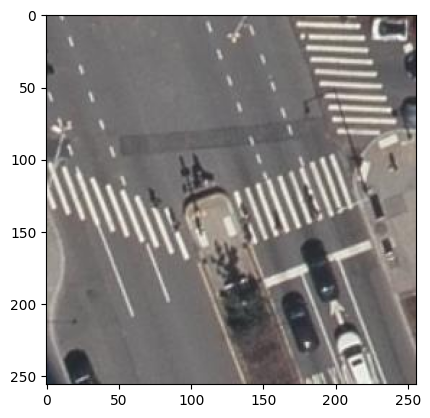

In [ ]:
import matplotlib.pyplot as plt
#plt.imshow(jas._stitch_image(intersection2tile.loc[0]).reshape([256*2,256*2,3]))
#plt.imshow(jas._stitch_image(intersection2tile.loc[1]).reshape([256*3,256*3,3]))
# for i in jas._stitch_image(intersection2tile.loc[0]):
#     plt.imshow(i[1])

stitched = jas._stitch_image(intersection2tile.loc[0])

# plt.imshow(stitched[0][0])
# plt.imshow(stitched[1][0])
# plt.imshow(stitched[0][1])
# plt.imshow(stitched[1][1])
#         print(j)
#         plt.imshow(j)
# # temp = (jas._stitch_image(intersection2tile.loc[0])[0][0].shape)
# # plt.imshow(temp)
# # #plt.imshow(jas._stitch_image(intersection2tile.loc[0])[[0,0]])

In [6]:
# vals_X = set(sorted_df.groupby(level=0).count()['file_path'])
# vals_X.pop()
#set(sorted_df.groupby(level=1).count()['file_path'])
sorted_df.groupby(level=0).count()['file_path']

xtile
308783    3
308784    3
308785    3
Name: file_path, dtype: int64

NameError: name 'itx2tile' is not defined

In [ ]:
buffer_values = jas._set_buffer_width(20, nodes)

# Now create buffer_geometries for each
buffer_geometries = jas.generate_buffer_geometry(
    nodes.geometry, 
    buffer_values, 
    'square'
)

# Add buffer geometry column
nodes_buffered = nodes.copy()
nodes_buffered['geometry'] = buffer_geometries

# Swap geom to buffer
#nodes_buffered = nodes_buffered.set_geometry('buffer_geometries')

# Conduct Spatial Join
intersections_df = (
    nodes_buffered.sjoin(
        tile_ref_gdf.to_crs(nodes_buffered.crs)
    ) # Spatial join 
    .reset_index()
    .rename(columns={'osmid':'intersection_id'}) #FLAG
)

intersection2tile = (
        intersections_df[['intersection_id','xtile','ytile']]
        .value_counts()
        .reset_index()
        .drop(columns='count')
        .rename(columns={'index_right':'tile_id'})
        .set_index('intersection_id')
    )

#intersection2tile_complete = jas.complete_dataframe(intersection2tile, ['xtile','ytile'])
#intersection2tile_complete
#jas.complete_dataframe(intersection2tile.loc[1], ['xtile','ytile'])
cols = []
for c in ['xtile','ytile']:
    cols.append(intersection2tile.loc[1][c].unique())

import pandas as pd
pd.MultiIndex.from_product(cols, names=['xtile','ytile']).to_frame(index=False)
intersection2tile.groupby(level=0).apply(jas.complete_dataframe)

intersection2tile_complete = intersection2tile.groupby(level=0).apply(jas.complete_dataframe, column_names=['xtile','ytile'])
intersection2tile_complete['file_path'] = intersection2tile_complete.apply(lambda x: os.path.join(STATIC_PATH, f"{x['xtile']}_{x['ytile']}.png"), axis=1)
intersection2tile_complete.reset_index().set_index(['intersection_id','xtile','ytile']).drop('level_1',axis=1)

file_path
intersection_id xtile  ytile                                                    
0               308797 394323  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394324  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                308798 394323  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394324  /Users/jon/Documents/Employment/2025 VIDA Lab/...
1               308780 394323  /Users/jon/Documents/Employment/2025 VIDA Lab/...
...                                                                          ...
69              308794 394337  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394339  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                308793 394338  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394337  /Users/jon/Documents/Employment/2025 VIDA Lab/...
                       394339  /Users/jon/Documents/Employment/2025 VIDA Lab/...

[482 rows x 1 columns]

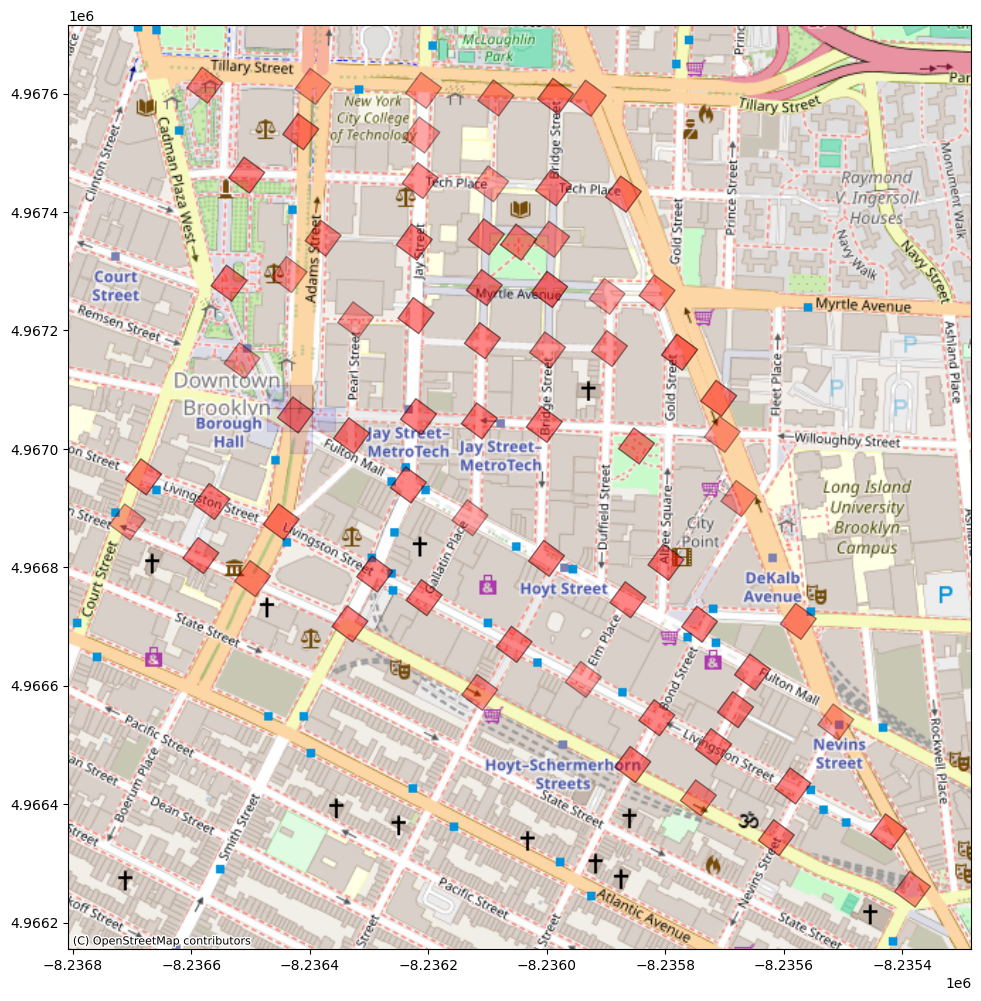

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx
# intersections_df.plot()
# tile_ref_gdf.plot(edgecolor='black')

fig, ax = plt.subplots(figsize=(12,12))
(
    intersections_df
    .to_crs('EPSG:3857')
    .plot(
        ax=ax,
        color="red",
        alpha=0.1,
        edgecolor="black"
    )
)

(
    tile_ref_gdf
    .to_crs('EPSG:3857')
    .merge(
        intersection2tile.loc[[1]]
    )
    .plot(
        ax=ax,
        facecolor="blue",
        alpha=0.1,
        edgecolor="black"
    )
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.show()

#tile_ref_gdf.set_index(['xtile','ytile'])
# intersection2tile.loc[[0]].set_index(['xtile','ytile']).merge(
#     tile_ref_gdf.set_index(['xtile','ytile']),
#     left_index=True, right_index=True
# )

#intersection2tile.loc[[1]].merge(tile_ref_gdf)

In [ ]:
buffer_values = jas._set_buffer_width(20, nodes)
buffer_geometries = jas.generate_buffer_geometry(
        nodes.geometry, 
        buffer_values, 
        'square'
    )

buffer_geometries

import pandas as pd

nodes_buffered = nodes.copy()
#pd.concat([nodes, buffer_geometries], axis=1)
nodes_buffered.crs

<Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meter)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
def complete_dataframe(input_slice:pd.DataFrame, columns:list[str]=['xtile','ytile']):
    cols = []

    for c in columns:
        cols.append(input_slice[c].unique())

    return pd.MultiIndex.from_product(cols).to_frame(index=False)
    


xtiles = intersection2tile.loc[[0]]['xtile'].unique() 
xtiles
ytiles = intersection2tile.loc[[0]]['ytile'].unique() 
ytiles

pd.MultiIndex.from_product([xtiles, ytiles])

xtiles = intersection2tile.loc[[1]]['xtile'].unique() 
xtiles
ytiles = intersection2tile.loc[[1]]['ytile'].unique() 
ytiles

pd.MultiIndex.from_product([xtiles, ytiles], names=columns).to_frame(index=False)

,0
0,308780
1,308779
2,308778


In [ ]:
# Recreate the buffer_and_load function
buffer_width = 20
buffer_type = 'square'

buffer_values = jas._set_buffer_width(buffer_width, nodes)

# Now create buffer_geometries for each
buffer_geometries = jas.generate_buffer_geometry(
    nodes.geometry, 
    buffer_values, 
    buffer_type
)

# Add buffer geometry column
nodes_buffered = nodes.copy()
nodes_buffered['geometry'] = buffer_geometries

# Swap geom to buffer
#nodes_buffered = nodes_buffered.set_geometry('buffer_geometries')

# Conduct Spatial Join
intersections_df = (
    nodes_buffered.sjoin(
        tile_ref_gdf.to_crs(nodes_buffered.crs)
    ) # Spatial join 
    .reset_index()
    .rename(columns={'osmid':'intersection_id'}) #FLAG
)

In [11]:
intersection2tile = (
        intersections_df[['intersection_id','xtile','ytile']]
        .value_counts()
        .reset_index()
        .drop(columns='count')
        .rename(columns={'index_right':'tile_id'})
        .set_index('intersection_id')
    )

In [15]:
intersection2tile
intersection2tile['file_path'] = intersection2tile.apply(lambda x: os.path.join(STATIC_PATH, f"{x['xtile']}_{x['ytile']}.png"), axis=1)
intersection2tile['file_path']

intersection_id
0     /Users/jon/Documents/Employment/2025 VIDA Lab/...
46    /Users/jon/Documents/Employment/2025 VIDA Lab/...
48    /Users/jon/Documents/Employment/2025 VIDA Lab/...
48    /Users/jon/Documents/Employment/2025 VIDA Lab/...
47    /Users/jon/Documents/Employment/2025 VIDA Lab/...
                            ...                        
22    /Users/jon/Documents/Employment/2025 VIDA Lab/...
22    /Users/jon/Documents/Employment/2025 VIDA Lab/...
22    /Users/jon/Documents/Employment/2025 VIDA Lab/...
22    /Users/jon/Documents/Employment/2025 VIDA Lab/...
69    /Users/jon/Documents/Employment/2025 VIDA Lab/...
Name: file_path, Length: 380, dtype: object

In [ ]:
nodes.crs

<Projected CRS: EPSG:7131>
Name: NAD83(2011) / San Francisco CS13
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California - San Francisco bay area - counties of Alameda, Contra Costa, Marin, Napa, San Francisco, San Mateo, Santa Clara, Santa Cruz, Solano and Sonoma.
- bounds: (-123.56, 36.85, -121.2, 38.87)
Coordinate Operation:
- name: City and County of San Francisco CS13 (meter)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich